The Pima Indian diabetes dataset was performed on 392 female patients of at least 21years old. These females were all of the Pima Indian heritage. 130 of these women tested positive while 262 tested negative. In the dataset,there are 7 independent variable and dependant variable. The variables are:

   Column Name         Definition
 * Pregnancies:         Number of times pregnant
 * Glucose:             Plasma glucose concentration after 2 hours in an oral glucose tolerance test
 * BloodPressure:       Diastolic blood pressure (mm Hg)
 * SkinThickness:       Triceps skin fold thickness (mm)
 * Insulin:             2-Hour serum insulin (mu U/ml)
 * BMI:                 Body mass index (weight in kg/(height in m)^2)
 * DiabetesPedigreeFunction: Diabetes pedigree function
 * Age:                 Age (years)
 * Diabetes:            Class variable (0 or 1)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
# Check for null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On a high level we can see that there is no missing value presnet in the dataset. However, we can see that Glucose,BloodPressure,SkinThickness,Insulin,BMI has minimum value as 0 which does not make any sense. Hence, we can consider them as missing value replae with np.nan


In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Missing Value imputation

In [13]:
#Check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
df.isnull().sum()/df.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

#### Glucose | Impute with median

In [15]:
df['Glucose_1']=df['Glucose'].fillna(df.Glucose.median())

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

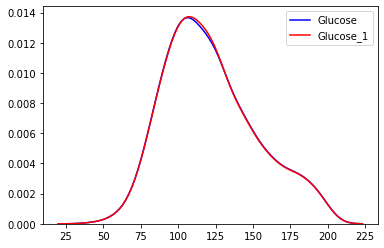

In [16]:
# Now let us check the distribution of the data after median imputation
sns.kdeplot(df['Glucose'], color='b', shade=False, Label='Glucose') 
sns.kdeplot(df['Glucose_1'], color='r', shade=False, Label='Glucose_1') 

We can see that meadian imputation has done a great job. Hence we do not require any other approach for missing value imputation for Glucose

In [17]:
df['Glucose']=df['Glucose_1']

#### BloodPressure | Impute with median

In [18]:
df['BloodPressure_1']=df['BloodPressure'].fillna(df.BloodPressure.median())

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

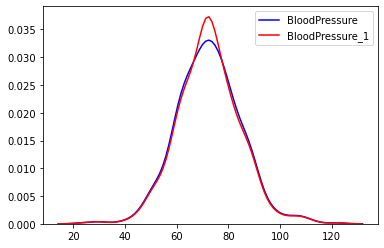

In [19]:
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['BloodPressure'], color='b', shade=False, Label='BloodPressure') 
sns.kdeplot(df['BloodPressure_1'], color='r', shade=False, Label='BloodPressure_1') 

Here also we can see that median imputation working nicely and no need of other approach

In [20]:
df['BloodPressure']=df['BloodPressure_1']

#### SkinThickness | Impute with median

In [21]:
df['SkinThickness_1']=df['SkinThickness'].fillna(df.BloodPressure.median())

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

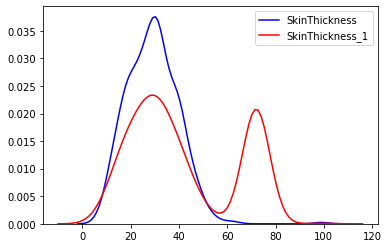

In [22]:
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['SkinThickness'], color='b', shade=False, Label='SkinThickness') 
sns.kdeplot(df['SkinThickness_1'], color='r', shade=False, Label='SkinThickness_1') 

For skin thikness,most of the missing values are replaced with meadin which is near 30. Hence the pick of the new column had concentrated there. But we also have a spike near 70

In [23]:
df['SkinThickness'].median()

29.0

Let us also check with random imputation technique here

#### SkinThickness | Impute with random value

First let us get the set of data from SkinThickness column where we do not have any null. Since this set of data is randomly taken,every time we run it, it be will getting changed. Hence,random_state=0 will ensure that once we pick the set it get fixed and do not change along with repeat iteration.Here note that we will be getting a list of value only for same number of rows where we have null. dropna() function will ensure this.

In [24]:
random_sample = df['SkinThickness'].dropna().sample(df['SkinThickness'].isnull().sum(),random_state=0)

In [25]:
#now we need to assign the index number of null rows to this set of data
random_sample.index = df[df['SkinThickness'].isnull()].index

In [26]:
random_sample.head()

2     31.0
5     30.0
7     30.0
9     17.0
10    29.0
Name: SkinThickness, dtype: float64

In [28]:
df['SkinThickness_2'] = df['SkinThickness'].median()
#df['SkinThickness_2'] = df.SkinThickness.replace(np.NaN, random_sample)

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

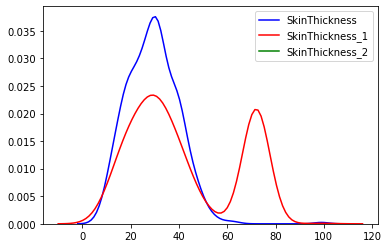

In [29]:
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['SkinThickness'], color='b', shade=False, Label='SkinThickness') 
sns.kdeplot(df['SkinThickness_1'], color='r', shade=False, Label='SkinThickness_1') 
sns.kdeplot(df['SkinThickness_2'], color='g', shade=False, Label='SkinThickness_2') 

We can see that random imputation is giving far more better result. Let us go ahead with random imputation

In [30]:
df['SkinThickness'] = df['SkinThickness_2']

#### BMI | Impute with median

In [31]:
df['BMI_1']=df['BMI'].fillna(df.BMI.median())

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

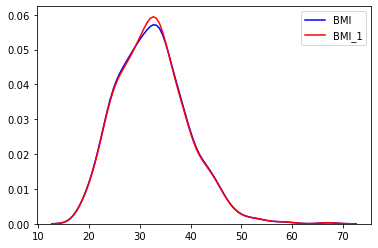

In [32]:
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['BMI'], color='b', shade=False, Label='BMI') 
sns.kdeplot(df['BMI_1'], color='r', shade=False, Label='BMI_1') 

We can see that meadin imputation is working fine for BMI. Hence let us go ahead with median imputation

In [33]:
df['BMI'] = df['BMI_1']

In [34]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Glucose_1                     0
BloodPressure_1               0
SkinThickness_1               0
SkinThickness_2               0
BMI_1                         0
dtype: int64

Now we can see that only insulin has empty value. Let us remove all unwanted columns

In [35]:
df.drop(['Glucose_1','BloodPressure_1','SkinThickness_1','SkinThickness_2','BMI_1'],axis=1,inplace = True)

#### Insulin | Impute with median

In [36]:
df['Insulin_1']=df['Insulin'].fillna(df.Insulin.median())

C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, y, color=color, label=label, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:323: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kwargs)
C:\Users\91973\Anaconda3\envs\newenv_1\lib\site-packages\seaborn\distributions.py:330: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases la

<AxesSubplot:>

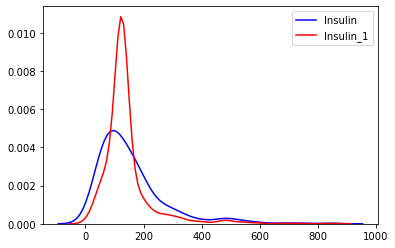

In [37]:
# Now let us check the distribution of the data after mean imputation
sns.kdeplot(df['Insulin'], color='b', shade=False, Label='Insulin') 
sns.kdeplot(df['Insulin_1'], color='r', shade=False, Label='Insulin_1') 

In [38]:
df['Insulin']=df['Insulin_1']

In [39]:
df.drop('Insulin_1',axis=1,inplace = True)

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

In [44]:
# Store independant variables to X
X = df.drop(['Outcome'], axis = 1)
# Store dependant variable to y
y = df['Outcome']

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (537, 8)
X_test: (231, 8)
y_train: (537,)
y_test: (231,)


### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [48]:
prediction=random_forest_model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[126  24]
 [ 33  48]]
0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       150
           1       0.67      0.59      0.63        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [51]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [52]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [53]:
best_random_grid=rf_randomcv.best_estimator_

In [54]:
y_pred=best_random_grid.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[125  25]
 [ 32  49]]
Accuracy Score 0.7532467532467533
Classification report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       150
           1       0.66      0.60      0.63        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [57]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.4min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [58]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       n_estimators=700)

In [59]:
best_grid=grid_search.best_estimator_

In [60]:
y_pred=best_grid.predict(X_test)

In [61]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[123  27]
 [ 33  48]]
Accuracy Score 0.7402597402597403
Classification report:               precision    recall  f1-score   support

           0       0.79      0.82      0.80       150
           1       0.64      0.59      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [62]:
print(best_grid.feature_importances_)

[0.08637967 0.26603437 0.09781698 0.         0.09618313 0.17023944
 0.13923818 0.14410822]


In [63]:
feature_imp = pd.Series(best_grid.feature_importances_,index=X_test.columns)

<AxesSubplot:>

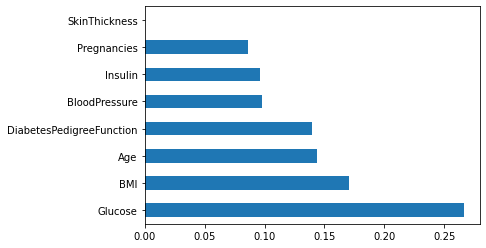

In [64]:
feature_imp.nlargest(8).plot(kind='barh')

In [65]:
feature_imp = pd.DataFrame(feature_imp).reset_index().rename(columns={'index':'feature',0:'importance'})

In [66]:
feature_imp.sort_values('importance',ascending=False)

,feature,importance
1,Glucose,0.266034
5,BMI,0.170239
7,Age,0.144108
6,DiabetesPedigreeFunction,0.139238
2,BloodPressure,0.097817
4,Insulin,0.096183
0,Pregnancies,0.086380
3,SkinThickness,0.000000


In [70]:
import pickle

In [71]:
# Saving model to disk
pickle.dump(best_grid, open('model.pkl','wb'))

In [72]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))